In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
import pcmdpy_gpu as ppy
%matplotlib inline

In [2]:
f = ppy.instrument.default_m31_filters()
iso_model = ppy.isochrones.Isochrone_Model(f)
driv = ppy.driver.Driver(iso_model, gpu=True)

In [3]:
g1 = ppy.galaxy.TauFull(np.array([0., -2., 1.5, 3., 24.42]))

In [16]:
imf, _, mass, _ = iso_model.model_galaxy(g1, downsample=5, return_mass=True)

In [17]:
imf_k, _ = iso_model.model_galaxy(g1, downsample=5, imf_func=ppy.isochrones.kroupa_IMF)

In [22]:
dm = np.log10((mass*imf).sum()) - np.log10((mass*imf_k).sum())

In [23]:
g2 = ppy.galaxy.TauFull(np.array([0., -2., 1.5+dm, 3., 24.42]))

In [24]:
pcmd_1 = driv.simulate(g1, 512)[0]

In [25]:
pcmd_2 = driv.simulate(g2, 512, imf_func=ppy.isochrones.kroupa_IMF)[0]

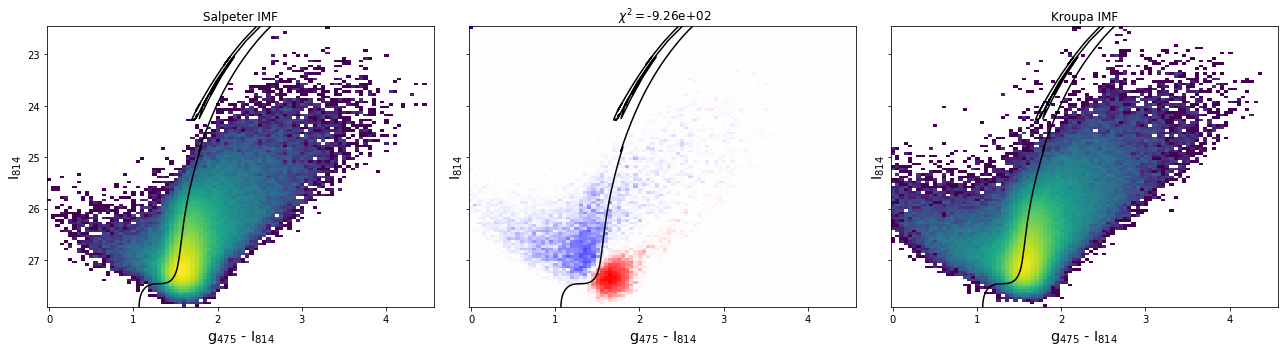

In [30]:
fig, axes = plt.subplots(ncols=3, figsize=(18, 5), sharex=True, sharey=True)
_, bins, norm = ppy.plotting.plot_pcmd(pcmd_1, ax=axes[0], title='Salpeter IMF')
ppy.plotting.plot_pcmd_residual(pcmd_1, pcmd_2, bins=bins, ax=axes[1])
ppy.plotting.plot_pcmd(pcmd_2, bins=bins, ax=axes[2], norm=norm, title='Kroupa IMF')
for ax in axes:
    ppy.plotting.plot_isochrone(iso_model, dmod=24.42, axes=ax)
plt.tight_layout()